In [1]:
import numpy as np 
import pandas as pd

import os
import tensorflow as tf
import numpy as np
from IPython.display import YouTubeVideo
from tensorflow import gfile
from tensorflow import logging

/home/vicker/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vicker/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vicker/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vicker/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

In [7]:
frame_lvl_record = '/home/vicker/Downloads/train0000.tfrecord'
feat_rgb = []
feat_audio = []
z = 0
for example in tf.python_io.tf_record_iterator(frame_lvl_record):  
    tf_seq_example = tf.train.SequenceExample.FromString(example)
    n_frames = len(tf_seq_example.feature_lists.feature_list['audio'].feature)
    sess = tf.InteractiveSession()
    rgb_frame = []
    audio_frame = []
    # iterate through frames
    tf_example = tf.train.Example.FromString(example)
    print(tf_example.features.feature['id'].bytes_list.value[0].decode(encoding='UTF-8'))
    for i in range(n_frames):
        rgb_frame.append(tf.cast(tf.decode_raw(
                tf_seq_example.feature_lists.feature_list['rgb']
                  .feature[i].bytes_list.value[0],tf.uint8)
                       ,tf.float32).eval())
        audio_frame.append(tf.cast(tf.decode_raw(
                tf_seq_example.feature_lists.feature_list['audio']
                  .feature[i].bytes_list.value[0],tf.uint8)
                       ,tf.float32).eval())
        
    sess.close()
    
    feat_audio.append(audio_frame)
    feat_rgb.append(rgb_frame)
    print(audio_frame)
    z+=1
    print(i)
    if z == 3:
        break

skaa
[array([172.,  25., 129.,  96., 195.,  86.,  65., 155., 155., 164., 143.,
        66., 115., 149., 113.,  24., 101., 255., 201., 192.,   0., 182.,
        91., 212.,  76., 150., 115., 183., 129.,  46., 179., 117., 117.,
        76., 165., 131., 146., 137., 208., 171., 112., 160.,  71., 126.,
       124., 134., 138., 105., 165.,  77., 126.,  79., 139.,  69.,  89.,
       181.,  80., 144., 104., 139., 106., 135., 140., 105., 152., 128.,
        94., 139., 124., 146., 124.,  98., 115., 125., 122., 117., 140.,
       128.,  88., 116., 133., 142., 118., 144., 116., 118., 112., 120.,
       103., 117., 143., 134., 107., 141., 111., 136., 117., 141., 109.,
       143., 142., 123., 133., 161., 121., 151., 110., 106., 111., 115.,
       128., 116., 125., 159., 121., 115., 102., 125., 123., 131., 121.,
       124., 127., 137., 126., 155., 146., 188.], dtype=float32), array([182.,  50., 141., 103., 189.,  95.,  94., 162.,  89., 178.,  99.,
       150., 121., 106., 128.,  61., 138., 132., 131

[array([  0., 255.,  29.,  42.,   0.,   0., 143., 166., 255.,   0.,  41.,
       255.,   0.,  35.,  38., 253., 120., 116.,  26., 144., 255.,  42.,
       255., 255., 146.,   0., 137.,  61.,   0.,   0.,   0.,   0.,   0.,
        84., 255.,   0., 255., 255., 250., 255., 255.,   0., 255., 106.,
       255., 129.,   0., 242., 255.,   0.,   0.,  72.,   0., 157.,   0.,
       255.,   0., 255., 238.,   0.,   0.,   0., 255.,   0., 255., 186.,
         0., 255., 116., 213.,   0.,   9.,   0., 255., 255., 255., 208.,
       230.,   0., 255.,  51., 129.,   0., 255.,   0.,   0., 110.,   0.,
         0.,  98.,  65., 101.,   0., 255., 255.,   0.,  86., 255., 196.,
       212., 255.,   0., 255., 224., 255.,  27.,   0., 255.,   0., 217.,
       221., 255.,  85.,   0.,   0.,   0.,  41.,  30.,   0.,   0., 119.,
        42.,   0., 219., 255.,   0.,   0., 255.], dtype=float32), array([100.,  83., 112., 101.,   5.,   6., 209., 121., 214.,   0., 167.,
       255.,   0., 140., 100., 218., 122.,  14., 160., 19

[array([160., 210., 105., 239., 208.,  98.,  21., 255., 249., 150.,  63.,
       113.,   0., 216., 228., 150., 203.,  98., 146., 203.,  78.,  99.,
        21., 192., 180., 242.,   0.,  45., 126.,  63., 108., 255.,  23.,
        97., 129., 250., 174., 210.,  92., 184.,  91., 191.,  92., 255.,
       255., 237.,   0.,  41., 238., 156.,  75., 255., 174.,   0., 104.,
       255., 153., 120.,   0., 138., 194., 182., 128., 248.,   0., 128.,
       114.,   5.,  42.,  47., 126., 207., 165.,  99., 251., 207.,  72.,
         0., 236., 255., 114., 139.,  15.,   0., 194., 244., 192., 166.,
       255., 255.,  61.,  16., 255.,   0., 255.,   0.,  14.,  86.,  56.,
         0., 116., 105., 231.,   7., 206., 255.,   0., 255., 255., 184.,
       255.,  86., 143.,  55.,   0.,  82., 103., 255., 221., 255., 198.,
       142.,   0.,   0., 173.,  65., 247.,   0.], dtype=float32), array([ 53., 255., 152., 255., 169., 212.,   0., 255., 255.,  64., 167.,
         0.,   0., 255., 255.,   0., 255.,   0., 100., 25

In [8]:
print('The first video has %d frames' %len(feat_audio[0]))
print('The first video has %d frames' %len(feat_rgb[0]))
feat_audio[0]

The first video has 165 frames
The first video has 165 frames


[array([172.,  25., 129.,  96., 195.,  86.,  65., 155., 155., 164., 143.,
         66., 115., 149., 113.,  24., 101., 255., 201., 192.,   0., 182.,
         91., 212.,  76., 150., 115., 183., 129.,  46., 179., 117., 117.,
         76., 165., 131., 146., 137., 208., 171., 112., 160.,  71., 126.,
        124., 134., 138., 105., 165.,  77., 126.,  79., 139.,  69.,  89.,
        181.,  80., 144., 104., 139., 106., 135., 140., 105., 152., 128.,
         94., 139., 124., 146., 124.,  98., 115., 125., 122., 117., 140.,
        128.,  88., 116., 133., 142., 118., 144., 116., 118., 112., 120.,
        103., 117., 143., 134., 107., 141., 111., 136., 117., 141., 109.,
        143., 142., 123., 133., 161., 121., 151., 110., 106., 111., 115.,
        128., 116., 125., 159., 121., 115., 102., 125., 123., 131., 121.,
        124., 127., 137., 126., 155., 146., 188.], dtype=float32),
 array([182.,  50., 141., 103., 189.,  95.,  94., 162.,  89., 178.,  99.,
        150., 121., 106., 128.,  61., 138., 1

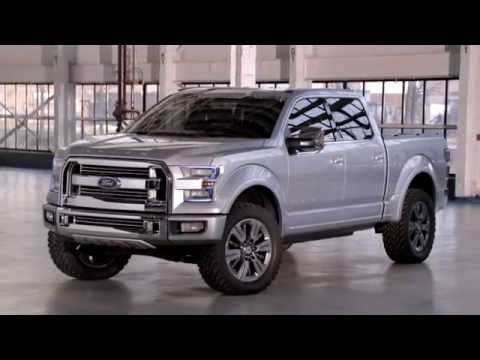

In [9]:
YouTubeVideo('K5pIOD7ZJtw')

In [15]:
import tensorflow as tf

sequence_example = open('/home/vicker/Downloads/features.pb', 'rb').read()
s = tf.train.SequenceExample.FromString(sequence_example)
s

context {
  feature {
    key: "AUDIO/feature/dimensions"
    value {
      int64_list {
        value: 128
      }
    }
  }
  feature {
    key: "AUDIO/feature/rate"
    value {
      float_list {
        value: 1.0
      }
    }
  }
  feature {
    key: "RGB/feature/dimensions"
    value {
      int64_list {
        value: 1024
      }
    }
  }
  feature {
    key: "RGB/feature/rate"
    value {
      float_list {
        value: 1.0
      }
    }
  }
  feature {
    key: "clip/data_path"
    value {
      bytes_list {
        value: "/home/vicker/Downloads/train0000.mp4"
      }
    }
  }
  feature {
    key: "clip/end/timestamp"
    value {
      int64_list {
        value: 120000000
      }
    }
  }
  feature {
    key: "clip/start/timestamp"
    value {
      int64_list {
        value: 0
      }
    }
  }
}
feature_lists {
  feature_list {
    key: "AUDIO/feature/floats"
    value {
      feature {
        float_list {
          value: 0.7069656848907471
          value: -1.59

In [2]:
i = 0
for example in tf.python_io.tf_record_iterator('/home/vicker/Desktop/train3764.tfrecord'):  
    tf_seq_example = tf.train.SequenceExample.FromString(example)
    n_frames = len(tf_seq_example.feature_lists.feature_list['audio'].feature)
    sess = tf.InteractiveSession()
    rgb_frame = []
    audio_frame = []
    print(tf_seq_example.context.feature['id'])
    i+=1
    if i ==6:
        break

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
bytes_list {
  value: "/storage/haibn/yt8m/2/video_news/train8220new.mp4"
}

bytes_list {
  value: "/storage/haibn/yt8m/2/video_news/train8220new.mp4"
}

bytes_list {
  value: "/storage/haibn/yt8m/2/video_news/train8220new.mp4"
}

bytes_list {
  value: "/storage/haibn/yt8m/2/video_news/train8220new.mp4"
}

bytes_list {
  value: "/storage/haibn/yt8m/2/video_news/train8220new.mp4"
}

bytes_list {
  value: "/storage/haibn/yt8m/2/video_news/train8220new.mp4"
}



/home/vicker/.local/lib/python3.6/site-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
record_iterator = tf.python_io.tf_record_iterator('/home/vicker/Desktop/output17.tfrecord')
writer =  tf.io.TFRecordWriter('/home/vicker/Desktop/output173.tfrecord')
for string_record in record_iterator:
    example = tf.train.SequenceExample()
    example.ParseFromString(string_record)
    

    
    writer.write(example.SerializeToString())
writer.close()
#         for b_str in b:
#             b = tf.python_io.tf_record_iterator('/home/vicker/Desktop/train_new_0.tfrecord')
#             b_ex = tf.train.SequenceExample()
#             b_ex.ParseFromString(string_record)
#             print(b_ex)
#             writer.write(b_ex.SerializeToString())


In [3]:
record_iterator = tf.python_io.tf_record_iterator('/home/vicker/Desktop/train3764.tfrecord')
i = 0
writer =  tf.io.TFRecordWriter('/home/vicker/Desktop/output172.tfrecord')
for string_record in record_iterator:
    example = tf.train.Example()
    example.ParseFromString(string_record)
    print(example.features.feature['id'])
    #print(example.features.feature['labels'])
    example.features.feature['labels'].int64_list.value[0] = 0
    #print(example)
    #writer.write(example.SerializeToString())
    i+=1
    if i ==13:
        break
writer.close()
#     image = example.features.feature["rgb"].b

bytes_list {
  value: "/storage/haibn/yt8m/2/video_news/train8220new.mp4"
}

bytes_list {
  value: "/storage/haibn/yt8m/2/video_news/train8220new.mp4"
}

bytes_list {
  value: "/storage/haibn/yt8m/2/video_news/train8220new.mp4"
}

bytes_list {
  value: "/storage/haibn/yt8m/2/video_news/train8220new.mp4"
}

bytes_list {
  value: "/storage/haibn/yt8m/2/video_news/train8220new.mp4"
}

bytes_list {
  value: "/storage/haibn/yt8m/2/video_news/train8220new.mp4"
}

bytes_list {
  value: "/storage/haibn/yt8m/2/video_news/train8220new.mp4"
}

bytes_list {
  value: "/storage/haibn/yt8m/2/video_news/train8220new.mp4"
}

bytes_list {
  value: "/storage/haibn/yt8m/2/video_news/train8220new.mp4"
}

bytes_list {
  value: "/storage/haibn/yt8m/2/video_news/train8220new.mp4"
}

bytes_list {
  value: "/storage/haibn/yt8m/2/video_news/train8220new.mp4"
}

bytes_list {
  value: "/storage/haibn/yt8m/2/video_news/train8220new.mp4"
}

bytes_list {
  value: "/storage/haibn/yt8m/2/video_news/train8220new.mp4"
}


In [ ]:
record_iterator = tf.python_io.tf_record_iterator('/home/vicker/Downloads/test.tfrecord')
i = 0
for string_record in record_iterator:
    example = tf.train.Feature()
    example.ParseFromString(string_record)
    print(example)
#     image = example.features.feature["rgb"].b

In [ ]:
vid_ids = []
labels = []
i = 0
for example in tf.python_io.tf_record_iterator(frame_lvl_record):
    tf_example = tf.train.Example.FromString(example)
    vid_ids.append(tf_example.features.feature['id']
                   .bytes_list.value[0].decode(encoding='UTF-8'))
    labels.append(tf_example.features.feature['labels'].int64_list.value)
    i+=1
    if i ==3 :
        break
print(vid_ids)

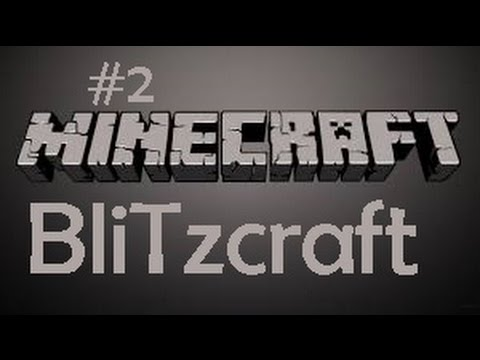

In [5]:
YouTubeVideo('BX_zpLr4XqI')

In [ ]:
feature_list = {
    'rgb': tf.train.FeatureList(feature=rgb_features),
}
context_features = {
    FLAGS.labels_feature_key:
        _int64_list_feature(sorted(map(int, labels.split(';')))),
    'id':
        _bytes_feature(_make_bytes(map(ord, video_file))),
    'mean_' + 'rgb':
        tf.train.Feature(
            float_list=tf.train.FloatList(value=mean_rgb_features)),
}


In [ ]:
s = 'train3764.tfrecord'
s[:5]

In [ ]:
 with tf.name_scope("input"):
    files = gfile.Glob('/home/vicker/Desktop/output17.tfrecord')
    if not files:
      raise IOError("Unable to find input files. data_pattern='" +
                    data_pattern + "'")
    logging.info("number of input files: " + str(len(files)))
    filename_queue = tf.train.string_input_producer(files,
                                                    num_epochs=1,
                                                    shuffle=False)
    examples_and_labels = [
        reader.prepare_reader(filename_queue) for _ in range(1)
    ]

    input_data_dict = (tf.train.batch_join(examples_and_labels,
                                           batch_size=batch_size,
                                           allow_smaller_final_batch=True,
                                           enqueue_many=True))
    video_id_batch = input_data_dict["video_ids"]
    video_batch = input_data_dict["video_matrix"]
    num_frames_batch = input_data_dict["num_frames"]

In [ ]:
index = 10
for i in range(index +1,19):
    print(i)